In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression

In [3]:
X , y = make_regression(n_features=1 , n_informative=1 , n_targets=1 , n_samples=100 , noise=20 , random_state=43)

In [4]:
X.shape , y.shape

((100, 1), (100,))

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train.shape , X_test.shape

((80, 1), (20, 1))

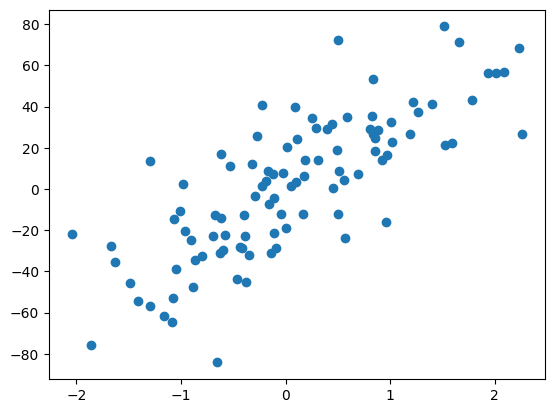

In [6]:
plt.scatter(X , y)
plt.show()

In [7]:
ls = Lasso(alpha=0.01)
ls.fit(X_train , y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [8]:
y_pred = ls.predict(X_test)
print("MAE" , mean_absolute_error(y_test , y_pred))
print("R2_SCORE" , r2_score(y_test , y_pred ))

MAE 16.35347735626126
R2_SCORE 0.5751405149070976


c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+04, tolerance: 8.925e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

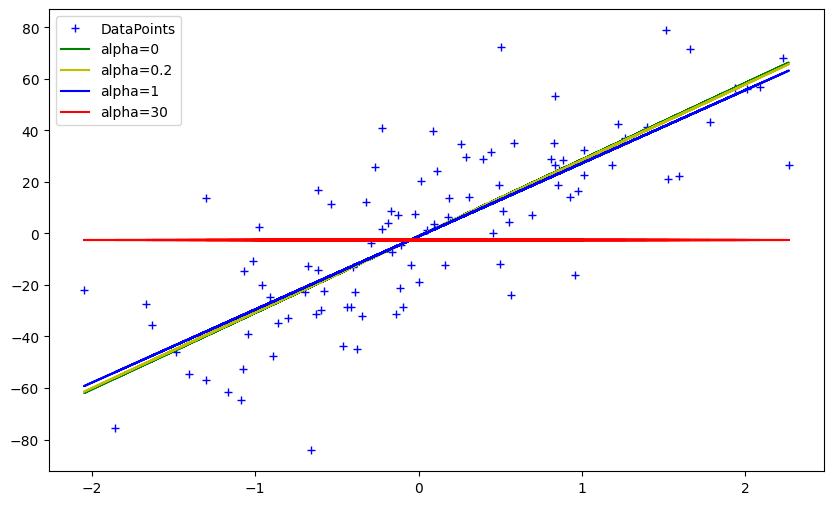

In [18]:
# If we increase the Value of lambda = alpha then coeficient will become exactly zero in lasso 
# But in ridge it will never become zero but it will approach to zero if lambda we are increasing 
alpha = [0 , 0.2 , 1 , 30]
c = ['g' , 'y' , 'b' , 'r']

plt.figure(figsize=(10,6))
plt.plot(X , y , 'b+' , label='DataPoints')

for c,i in zip(c ,alpha) :
    ls2 = Lasso(alpha=i)
    ls2.fit(X_train , y_train)
    y_pred = ls2.predict(X)
    plt.plot(X , y_pred ,c=c, label=f'alpha={i}')
plt.legend()    
plt.show()    

In [ ]:
# Here You can see that for alpha=30 the value of weights = 0  (Underfitting)

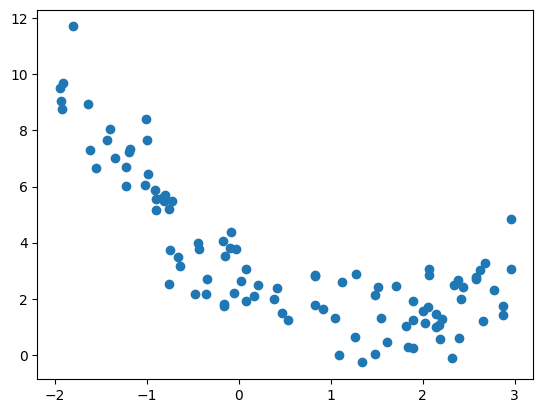

In [21]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.645e+01, tolerance: 6.740e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

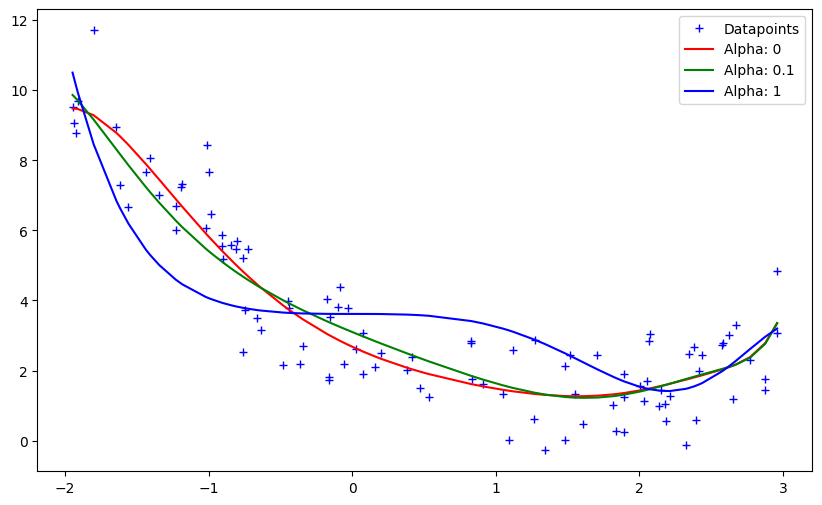

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [23]:
# Lasso Regression can work as feature selection 
# for medium value of alpha the weights corresponding to some faeute column will beocome zero 
# the weights which are  becoming zero for the feature columns , that column  is not important for model
# so we can drop that column for model and remaining will become input feature to model

In [24]:
# Lets see through code 

data = load_diabetes()

In [33]:
X = data['data']
y = data['target']
features = data['feature_names']

In [39]:
len(features)

10

In [34]:
df = pd.DataFrame(X , columns=features)

In [35]:
df.shape

(442, 10)

In [36]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [42]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

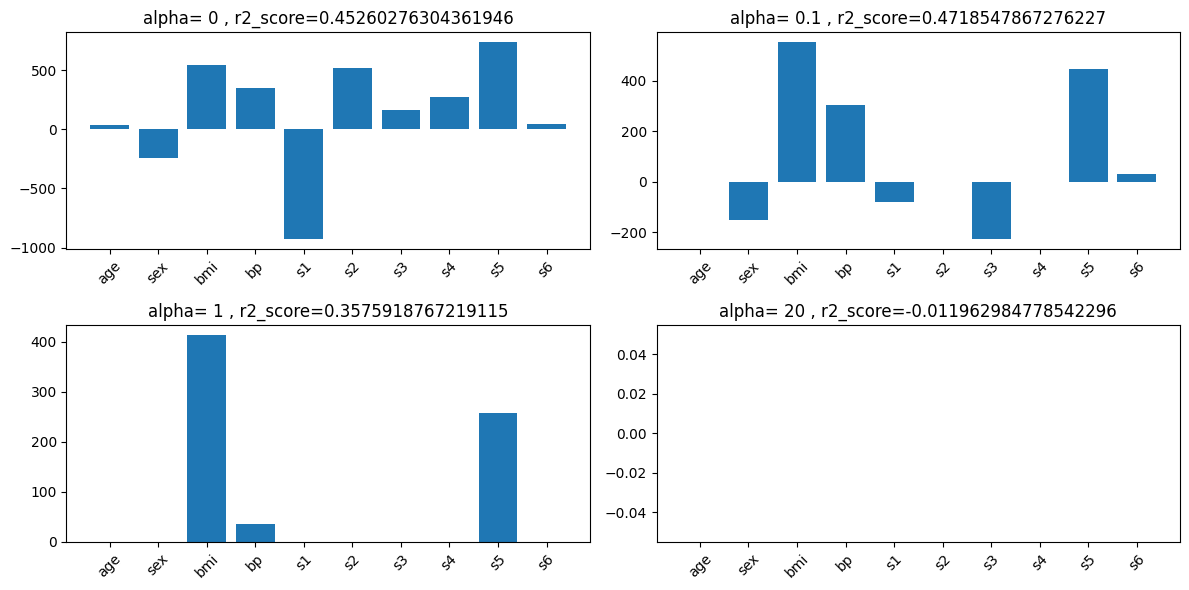

In [45]:
alpha = [0 , 0.1 , 1 , 20 ]
weights = []
r2 = []
for i in alpha:
    ls = Lasso(alpha=i)
    ls.fit(X_train,y_train)
    weights.append(ls.coef_.tolist())
    r2.append(r2_score(y_test , ls.predict(X_test)))



n = len(weights)

# Create subplots (2 per row)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Flatten axes for easy indexing
axes = axes.flatten()

for i, values in enumerate(weights):
    axes[i].bar(features, values)
    axes[i].set_title(f"alpha= {alpha[i]} , r2_score={r2[i]}")
    axes[i].set_xticklabels(features, rotation=45)




plt.tight_layout()
plt.show()

In [44]:
# From 2nd figure we can see that age , s2 , s4 are least important feature for model so we can drop these column 
# Lasso will set the value of weights to 0 corresponding to those feature which are less imp
# and from last fig we can see that if alpha is high then all cof are zero 
